In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np

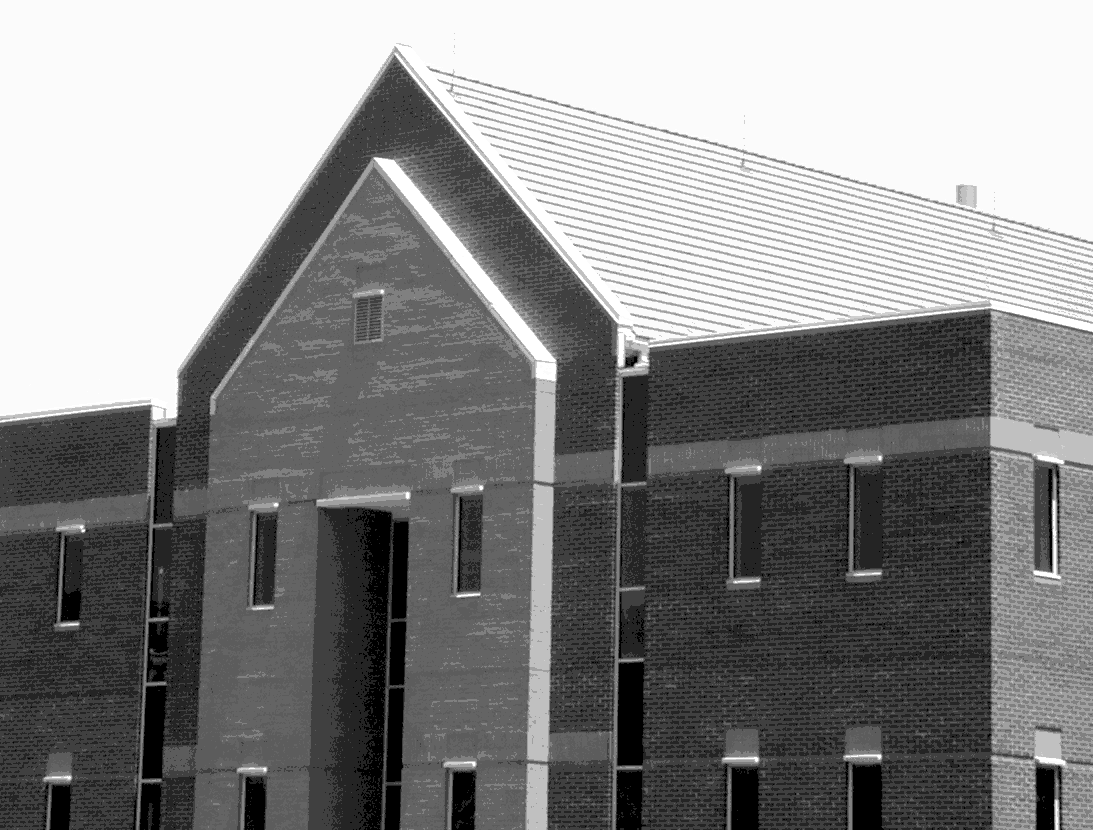

In [ ]:
image = cv2.imread('building.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2_imshow(image)

# Sobel

In [ ]:
hori_1 = cv2.Sobel(image, cv2.CV_16S, 0, 1, ksize=3) # Horizontal Sobel operator
vert_1 = cv2.Sobel(image, cv2.CV_16S, 1, 0, ksize=3) # Vertical Sobel operator

In [ ]:
hori_1 = abs(hori_1)
vert_1 = abs(vert_1)

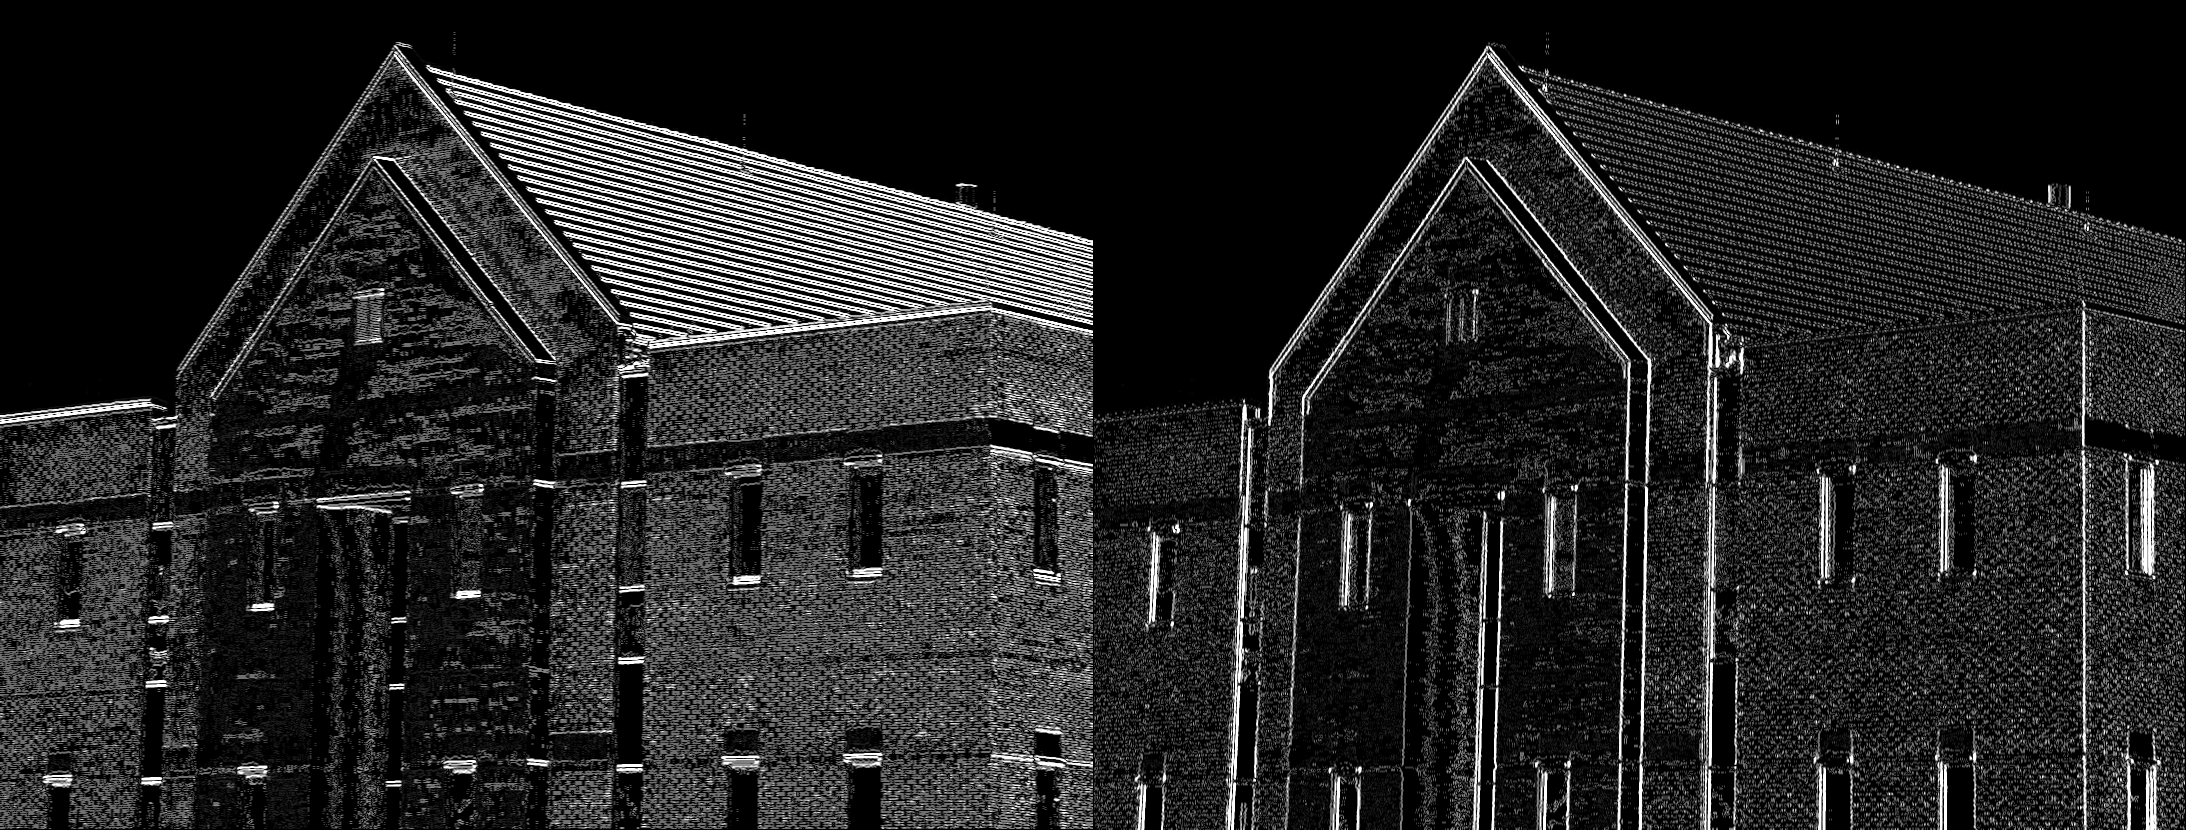

In [ ]:
inline_display = np.concatenate((hori_1, vert_1), axis=1)
cv2_imshow(inline_display)

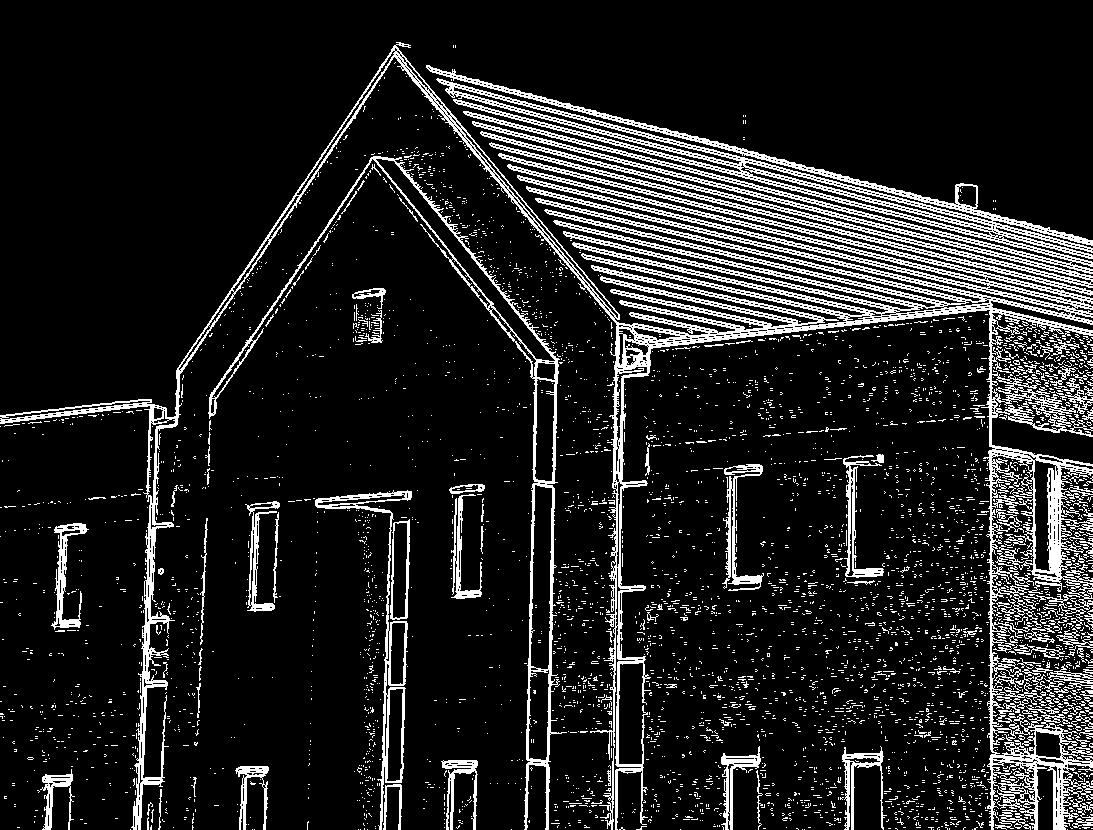

In [ ]:
image1 = np.bitwise_or(hori_1, vert_1)
_, image1 = cv2.threshold(image1, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(image1)

# Laplacian

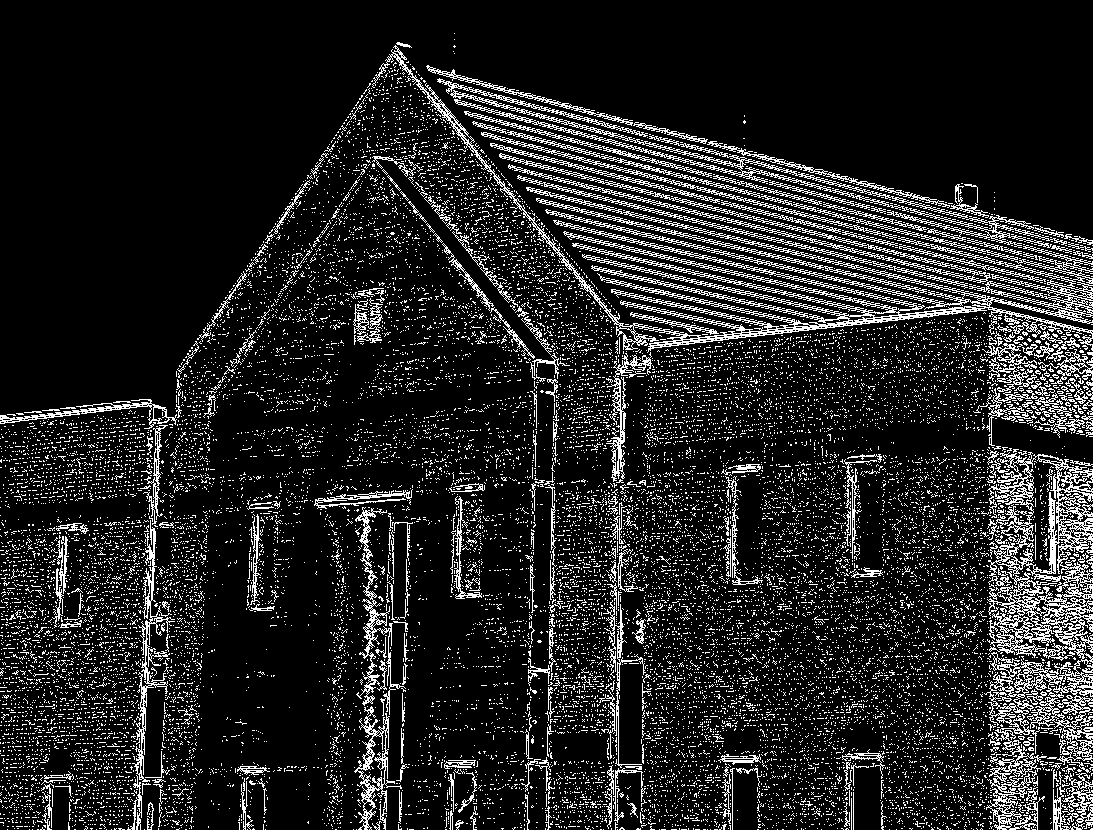

In [ ]:
image2 = cv2.Laplacian(image, cv2.CV_16S, ksize=3)
image2 = abs(image2)
_, image2 = cv2.threshold(image2, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(image2)

# True Values = image2  
# Predictor Values = image1

In [ ]:
tp2 = np.sum(np.bitwise_and(image1, image2))
fp2 = np.sum(np.bitwise_and(image1, np.bitwise_not(image2)))
precision2 = tp2 / (tp2 + fp2)

print(f'TP: {tp2}\nFP: {fp2}\nPrecision: {precision2}')

TP: 15248490
FP: 14680860
Precision: 0.5094828320695237


# True Values = image1
# Predictor Values = image2

In [ ]:
tp1 = np.sum(np.bitwise_and(image2, image1))
fp1 = np.sum(np.bitwise_and(image2, np.bitwise_not(image1)))
precision1 = tp1 / (tp1 + fp1)

print(f'TP: {tp1}\nFP: {fp1}\nPrecision: {precision1}')

TP: 15248490
FP: 16225140
Precision: 0.48448463046683843


# Results

In [ ]:
from tabulate import tabulate

data = [['TP', str(tp1), str(tp2)], ['FP', str(fp1), str(fp2)], ['PRECISION', str(precision1), str(precision2)]]
index=['TP', 'FP', 'PRECISION']

head = ['', 'image1', 'image2']

print(tabulate(data, headers=head, tablefmt='fancy_grid'))

╒═══════════╤═════════════╤═════════════╕
│           │      image1 │      image2 │
╞═══════════╪═════════════╪═════════════╡
│ TP        │ 1.52485e+07 │ 1.52485e+07 │
├───────────┼─────────────┼─────────────┤
│ FP        │ 1.62251e+07 │ 1.46809e+07 │
├───────────┼─────────────┼─────────────┤
│ PRECISION │ 0.484485    │ 0.509483    │
╘═══════════╧═════════════╧═════════════╛
